In [6]:
# -*- coding: utf-8 -*-
"""
Assignment 2: Stylus calibration
Part 1: Calibration computation
Part 2: Calibration verification
"""

'\nAssignment 2: Stylus calibration\nPart 1: Calibration computation\nPart 2: Calibration verification\n'

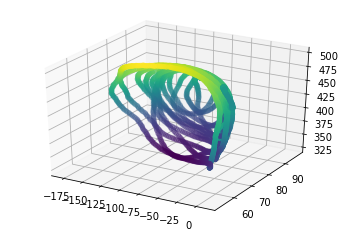

In [7]:
# Import libraries
import numpy as np # (2 points)
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt # (2 points)

### PART 1 ###

# Set filepath
filePath = 'C:/Users/Administrator.BF-201906221526/Desktop/CS569/A2/PivotCalib3.tsv' # (2 points)
# Read the measurements from optical tracking system
op = np.genfromtxt(fname = filePath , delimiter='\t') # (6 points)

# Extract the quaternion components
Q0 = op[1:,5] # (1 point)
Qx = op[1:,6] # (1 point)
Qy = op[1:,7] # (1 point)
Qz = op[1:,8] # (1 point)
# Extract the three columns of the position components (they are already expressed in millimeters)
Ts = op[1:,9:12]  # (1 point)

# Visualize sensor position measurements FYI
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Ts[:,0], Ts[:,1], Ts[:,2], c=Ts[:,2]) # (3 points)
plt.show()

In [8]:
# Stack all the translation measurement from the optical sensor
# by reshaping Ts of size Nx3 to a column vector of size 3Nx1
refTs = np.array(Ts.reshape(Ts.shape[0]*Ts.shape[1], 1)) # (7 points)

# Convert quaternion from the optical sensor to rotation matrix 
# A 3x3 rotation matrix between reference frame 'ref' and the sensor 's'is created from quaternion
refRs = []
# Iterate through the measurements
for measurementOP in range(len(op)-1): # (3 points)
# Convert the quaternion to rotation matrix
    r = R.from_quat([Qx[measurementOP], Qy[measurementOP], Qz[measurementOP], Q0[measurementOP]])
# Create the matrix on the middle of the equation from the pdf of the lecture 4, page 31 (15 points)
    refRs.append(np.concatenate((r.as_matrix(), -np.identity(3)), axis=1))

# All the rotation matrices are stacked together
refRs = np.stack(refRs)  # (5 points)
# Solve the equation using least square optimization
optimizedT = np.linalg.lstsq(refRs.reshape(8109,-1), -refTs, rcond=-1)
# Extract the first three components to get sTp
sTp = optimizedT[0][0:6] # (4 points)
sTp

array([[ -16.67771015],
       [   2.81973314],
       [-157.45569179],
       [-100.08131435],
       [ -60.40655514],
       [ 407.98106754]])

In [10]:
### PART 2 ###
# Reminder: report on a seperate document (submit it as a pdf file) how would you verify the quality of the calibration 
# You should provide a numerical value of the calibration error in millimeters and with two numbers after the decimal point
# (5 points)

# Now implement the calibration verification 
# Given the optimized calibration and rotation measurements, estimate the actual position measurements
estimatedPositions = -(refRs[:, :, 0:6] @ sTp) # (5 points)

# Compute calibration error: difference between actual measurements and estimation from calibration
error = Ts - estimatedPositions.reshape(2703,-1) # (3 points)
error_reshaped = np.array(error.reshape(len(refTs),-1)) # (10 points)
# Compute Euclidean distance 
error_Euclidean = np.linalg.norm(error_reshaped,axis=1) # (10 points)
# Compute the mean distance (error)
mean_error = np.mean(error_Euclidean)  # (3 points)
print('Calibration error is: %.2f mm' % mean_error)

Calibration error is: 0.28 mm
